In [57]:
import sklearn 
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
from sklearn.datasets import fetch_openml

In [11]:
df=fetch_openml("titanic",version=1, as_frame=True)["data"]

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   int64   
 1   name       1309 non-null   object  
 2   sex        1309 non-null   category
 3   age        1046 non-null   float64 
 4   sibsp      1309 non-null   int64   
 5   parch      1309 non-null   int64   
 6   ticket     1309 non-null   object  
 7   fare       1308 non-null   float64 
 8   cabin      295 non-null    object  
 9   embarked   1307 non-null   category
 10  boat       486 non-null    object  
 11  body       121 non-null    float64 
 12  home.dest  745 non-null    object  
dtypes: category(2), float64(3), int64(3), object(5)
memory usage: 115.4+ KB


<Axes: title={'center': 'missing values percentage'}, ylabel='percentage'>

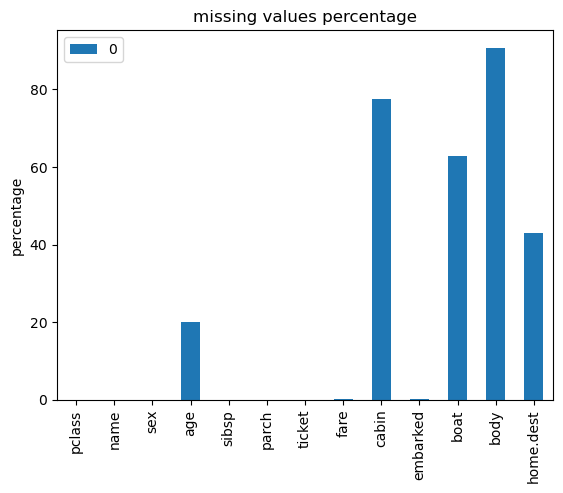

In [16]:
miss=pd.DataFrame(df.isnull().sum()/len(df)*100)
miss.plot(kind='bar',title="missing values percentage",ylabel="percentage")


In [18]:
from sklearn.impute import SimpleImputer

In [67]:
# imputing the null values with mean
imp=SimpleImputer(strategy='mean')
df["age"]=imp.fit_transform(df[["age"]]).ravel()

In [23]:
df.isnull().sum()
# only replaced null values of numeric data to fix that we can do the next cell

pclass          0
name            0
sex             0
age             0
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [35]:
def get_para(df):
    para = {}
    for col in df.columns[df.isnull().any()]:
        dtype = df[col].dtype
        
        if dtype == 'float64' or dtype == 'int64' or dtype == 'int32':
            strategy = 'mean'
        else:
            strategy = 'most_frequent'
        
        missing_val = df[col][df[col].isnull()].values[0]
        para[col] = {"missing_value": missing_val, "strategy": strategy}
    
    return para
get_para(df)

{'fare': {'missing_value': np.float64(nan), 'strategy': 'mean'},
 'cabin': {'missing_value': nan, 'strategy': 'most_frequent'},
 'embarked': {'missing_value': nan, 'strategy': 'most_frequent'},
 'boat': {'missing_value': nan, 'strategy': 'most_frequent'},
 'body': {'missing_value': np.float64(nan), 'strategy': 'mean'},
 'home.dest': {'missing_value': nan, 'strategy': 'most_frequent'}}

In [42]:
parameter=get_para(df)
for col ,param in parameter.items():
    missing_values=param['missing_value']
    strategy=param['strategy']
    imp=SimpleImputer(missing_values=missing_values , strategy=strategy)
    df[col]=imp.fit_transform(df[[col]]).ravel()

In [43]:
df.isnull().sum()

pclass       0
name         0
sex          0
age          0
sibsp        0
parch        0
ticket       0
fare         0
cabin        0
embarked     0
boat         0
body         0
home.dest    0
dtype: int64

In [44]:
df.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,160.809917,"St Louis, MO"
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,160.809917,"Montreal, PQ / Chesterville, ON"
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,13,160.809917,"Montreal, PQ / Chesterville, ON"
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,13,135.000000,"Montreal, PQ / Chesterville, ON"
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,13,160.809917,"Montreal, PQ / Chesterville, ON"


<Axes: title={'center': 'passengers travelling alone'}, xlabel='travelled_alone'>

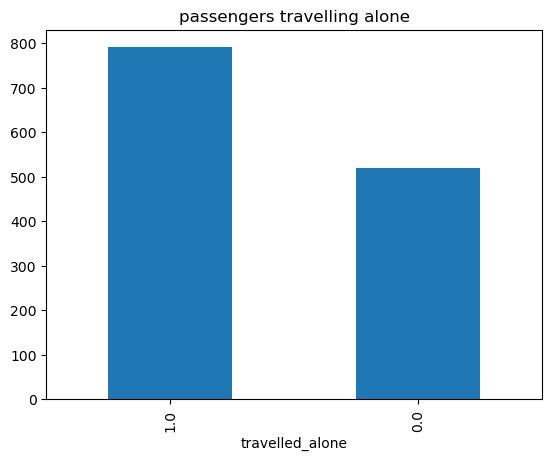

In [46]:
# feature engineering
df['family']=df['sibsp']+df['parch']
df.loc[df['family']>0 ,'travelled_alone']=0
df.loc[df['family']==0 ,'travelled_alone']=1
df['travelled_alone'].value_counts().plot(title='passengers travelling alone',kind='bar')

In [47]:
# Data encoding
from sklearn.preprocessing import OneHotEncoder
df[['female','male']]=OneHotEncoder().fit_transform(df[['sex']]).toarray()
df[['sex','female','male']]

,sex,female,male
0,female,1.0,0.0
1,male,0.0,1.0
2,female,1.0,0.0
3,male,0.0,1.0
4,female,1.0,0.0
...,...,...,...
1304,female,1.0,0.0
1305,female,1.0,0.0
1306,male,0.0,1.0
1307,male,0.0,1.0


In [48]:
df['sex']=OneHotEncoder().fit_transform(df[['sex']]).toarray()[:,1]

In [49]:
df.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,family,travelled_alone,female,male
0,1,"Allen, Miss. Elisabeth Walton",0.0,29.0000,0,0,24160,211.3375,B5,S,2,160.809917,"St Louis, MO",0,1.0,1.0,0.0
1,1,"Allison, Master. Hudson Trevor",1.0,0.9167,1,2,113781,151.5500,C22 C26,S,11,160.809917,"Montreal, PQ / Chesterville, ON",3,0.0,0.0,1.0
2,1,"Allison, Miss. Helen Loraine",0.0,2.0000,1,2,113781,151.5500,C22 C26,S,13,160.809917,"Montreal, PQ / Chesterville, ON",3,0.0,1.0,0.0
3,1,"Allison, Mr. Hudson Joshua Creighton",1.0,30.0000,1,2,113781,151.5500,C22 C26,S,13,135.000000,"Montreal, PQ / Chesterville, ON",3,0.0,0.0,1.0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0.0,25.0000,1,2,113781,151.5500,C22 C26,S,13,160.809917,"Montreal, PQ / Chesterville, ON",3,0.0,1.0,0.0


In [50]:
# data scaling making the values closer to each other to make the model understand things better
# Standard scaler
from sklearn.preprocessing import StandardScaler

In [51]:
num_cols=df.select_dtypes(include=['int64','float64','int32']).columns
num_cols

Index(['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'body', 'family',
       'travelled_alone', 'female', 'male'],
      dtype='object')

In [52]:
df[num_cols]=StandardScaler().fit_transform(df[num_cols])
df.describe()

,pclass,sex,age,sibsp,parch,fare,body,family,travelled_alone,female,male
count,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03
mean,-1.737003e-16,9.770641e-17,1.519878e-16,-8.142201e-18,1.628440e-17,4.342507e-17,-2.578364e-17,1.357033e-17,6.513761e-17,-9.770641e-17,9.770641e-17
std,1.000382e+00,1.000382e+00,1.000382e+00,1.000382e+00,1.000382e+00,1.000382e+00,1.000382e+00,1.000382e+00,1.000382e+00,1.000382e+00,1.000382e+00
min,-1.546098e+00,-1.344995e+00,-2.307330e+00,-4.790868e-01,-4.449995e-01,-6.437751e-01,-5.402590e+00,-5.583461e-01,-1.233758e+00,-7.434969e-01,-1.344995e+00
25%,-3.520907e-01,-1.344995e+00,-6.119712e-01,-4.790868e-01,-4.449995e-01,-4.911082e-01,0.000000e+00,-5.583461e-01,-1.233758e+00,-7.434969e-01,-1.344995e+00
50%,8.419164e-01,7.434969e-01,2.758687e-16,-4.790868e-01,-4.449995e-01,-3.643001e-01,0.000000e+00,-5.583461e-01,8.105319e-01,-7.434969e-01,7.434969e-01
75%,8.419164e-01,7.434969e-01,3.974806e-01,4.812878e-01,-4.449995e-01,-3.906640e-02,0.000000e+00,7.335229e-02,8.105319e-01,1.344995e+00,7.434969e-01
max,8.419164e-01,7.434969e-01,3.891737e+00,7.203909e+00,9.956864e+00,9.262219e+00,5.652087e+00,5.758637e+00,8.105319e-01,1.344995e+00,7.434969e-01


In [55]:
from sklearn.preprocessing import MinMaxScaler
df[num_cols]=MinMaxScaler().fit_transform(df[num_cols])
df[num_cols]

,pclass,sex,age,sibsp,parch,fare,body,family,travelled_alone,female,male
0,0.0,0.0,0.361169,0.000,0.000000,0.412503,0.488715,0.0,1.0,1.0,0.0
1,0.0,1.0,0.009395,0.125,0.222222,0.295806,0.488715,0.3,0.0,0.0,1.0
2,0.0,0.0,0.022964,0.125,0.222222,0.295806,0.488715,0.3,0.0,1.0,0.0
3,0.0,1.0,0.373695,0.125,0.222222,0.295806,0.409786,0.3,0.0,0.0,1.0
4,0.0,0.0,0.311064,0.125,0.222222,0.295806,0.488715,0.3,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1304,1.0,0.0,0.179540,0.125,0.000000,0.028213,1.000000,0.1,0.0,1.0,0.0
1305,1.0,0.0,0.372206,0.125,0.000000,0.028213,0.488715,0.1,0.0,1.0,0.0
1306,1.0,1.0,0.329854,0.000,0.000000,0.014102,0.926606,0.0,1.0,0.0,1.0
1307,1.0,1.0,0.336117,0.000,0.000000,0.014102,0.488715,0.0,1.0,0.0,1.0


In [58]:
# classification
x=np.array([[0,0],[0,1],[1,0],[1,1]])
y=np.array([0,1,1,0])
print(x ,"\n",y)

[[0 0]
 [0 1]
 [1 0]
 [1 1]] 
 [0 1 1 0]


In [59]:
# we neeed to have a weight value and a bias value
# for instance lets create a perceptron for or gate
w=np.array([1,1])
b=-0.5

In [61]:
# now we write the function ang give x as the input to see wht is the result
def activate(z):
    if z>=0:
        return 1
    else:
        return 0

In [62]:
prediction=[]
for a in x:
    z=np.dot(a,w)+b
    prediction.append(activate(z))

In [64]:
prediction
# matches y

[0, 1, 1, 1]

# now we see how the machine sets the weight value by itself

In [66]:
# to check accuracy sklearn.metrics import accuracy_score and confusion_matrix confusion matrix(y_test,pred)

In [68]:
# count vectorizor doesnt help in cross documents to find the vocabulary u  write vectorisor.vocabulary_

In [70]:
import pandas as pd

data = [
    # Existing entries...
    ("Paytm", "paytm.com"),
    ("PhonePe", "phonepe.com"),
    ("Razorpay", "razorpay.com"),
    ("Pine Labs", "pinelabs.com"),
    ("PolicyBazaar", "policybazaar.com"),
    ("Cred", "cred.club"),
    ("Groww", "groww.in"),
    ("Zerodha", "zerodha.com"),
    ("Upstox", "upstox.com"),
    ("BharatPe", "bharatpe.com"),
    ("Slice", "slice.com"),
    ("LazyPay", "lazypay.in"),
    ("MoneyTap", "moneytap.com"),
    ("KreditBee", "kreditbee.in"),
    ("CASHe", "cashe.co.in"),
    ("Navi", "navi.com"),
    ("ZestMoney", "zestmoney.in"),
    ("Capital Float", "capitalfloat.com"),
    ("EarlySalary", "earlysalary.com"),
    ("PaySense", "paysense.in"),
    ("Niyo", "goniyo.com"),
    ("Jupiter", "jupiter.money"),
    ("Open", "openmoney.co.in"),
    ("Fi", "fi.money"),
    ("Yono", "onlinesbi.com"),
    ("Smallcase", "smallcase.com"),
    ("ET Money", "etmoney.com"),
    ("Cube Wealth", "cubewealth.com"),
    ("Scripbox", "scripbox.com"),
    ("INDwealth", "indwealth.com"),
    ("Acko", "acko.com"),
    ("Digit Insurance", "digit.in"),
    ("Turtlemint", "turtlemint.com"),
    ("RenewBuy", "renewbuy.com"),
    ("PolicyBoss", "policyboss.com"),
    ("Signzy", "signzy.com"),
    ("Karza Technologies", "karza.in"),
    ("IDfy", "idfy.com"),
    ("Bureau.id", "bureau.id"),
    ("Simility", "simility.com"),
    ("Juspay", "juspay.in"),
    ("Setu", "setu.co"),
    ("Decentro", "decentro.io"),
    ("Cashfree", "cashfree.com"),
    ("PayU India", "payu.in"),
    ("Perfios", "perfios.com"),
    ("Crediwatch", "crediwatch.com"),
    ("CreditVidya", "creditvidya.com"),
    ("ScoreMe", "scoreme.in"),
    ("Fyp", "fyp.ai"),
    ("Amazon", "amazon.in"),
    ("Flipkart", "flipkart.com"),
    ("SBI", "onlinesbi.com"),
    ("HDFC Bank", "hdfcbank.com"),
    ("ICICI Bank", "icicibank.com"),
    ("Google Pay", "pay.google.com"),
    ("LIC", "licindia.in"),
    ("IRCTC", "irctc.co.in"),
    ("Myntra", "myntra.com"),
    ("Ajio", "ajio.com"),
    ("Tata Neu", "tatadigital.com"),
    ("Zomato", "zomato.com"),
    ("Swiggy", "swiggy.com"),
    ("MakeMyTrip", "makemytrip.com"),
    ("Cleartrip", "cleartrip.com"),
    ("Yatra", "yatra.com"),
    ("BookMyShow", "bookmyshow.com"),
    ("Mobikwik", "mobikwik.com"),
    ("Dream11", "dream11.com"),
    ("MPL", "mpl.live"),
    ("A23 Rummy", "a23.com"),
    ("Junglee Rummy", "jungleerummy.com"),
    ("RummyCircle", "rummycircle.com"),
    ("Adda52", "adda52.com"),
    ("PokerBaazi", "pokerbaazi.com"),
    ("Spartan Poker", "thespartanpoker.com"),
    ("WinZO", "winzo.games"),
    ("Gamezy", "gamezy.com"),
    ("Paytm First Games", "firstgames.in"),
    ("Zupee", "zupee.com"),
    ("Loco", "loco.gg"),
    ("Rooter", "rooter.gg"),
    ("KhelPlay Rummy", "khelplayrummy.com"),
    ("PokerStars India", "pokerstars.in"),
    ("9Stacks", "9stacks.com"),

    # 🆕 New additions
    ("PayPal", "paypal.com"),
    ("Microsoft", "microsoft.com"),
    ("Apple", "apple.com"),
    ("Netflix", "netflix.com"),
    ("Disney+ Hotstar", "hotstar.com"),
    ("Airtel", "airtel.in"),
    ("Jio", "jio.com"),
    ("BSNL", "bsnl.in"),
    ("Truecaller", "truecaller.com"),
    ("WhatsApp", "whatsapp.com"),
    ("Instagram", "instagram.com"),
    ("Facebook", "facebook.com"),
    ("Twitter (X)", "x.com"),
    ("Snapchat", "snapchat.com"),
    ("Ola", "olacabs.com"),
    ("Uber", "uber.com"),
    ("BigBasket", "bigbasket.com"),
    ("Blinkit", "blinkit.com"),
    ("Dunzo", "dunzo.com"),
    ("Bharat BillPay", "bharatbillpay.com"),
    ("IRDAI", "irdai.gov.in"),
    ("EPFO", "epfindia.gov.in"),
    ("Income Tax India", "incometax.gov.in"),
]

df = pd.DataFrame(data, columns=["label", "url"])
df.to_csv("phishing_targets.csv", index=False)

print("phishing_targets.csv updated successfully!")


phishing_targets.csv updated successfully!
